# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

### <font color='green'>**By: Mojtaba Ghasemi**</font>
### <font color='green'>**mjt.ghasemi@gmail.com**</font>


## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.



<a id='top'></a>
## Table of Contents

1. [Sourcing and loading](#1)
2. [Cleaning, transforming, and visualizing](#2)
3. [Modeling ](#3)
4. [Conclusion](#4)


## 1. Sourcing and loading<a class="anchor" id="1"></a>
[Back to Table of Contents](#top)


Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [55]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

print('Python: {}'.format(sys.version))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(plt.matplotlib.__version__))
print('seaborn: {}'.format(sns.__version__))


Python: 3.10.9 (main, Mar  1 2023, 12:33:47) [Clang 14.0.6 ]
pandas: 1.5.3
numpy: 1.23.5
matplotlib: 3.7.0
seaborn: 0.12.2


#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [56]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = 'https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls'

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
data_raw = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)


## 2. Cleaning, transforming, and visualizing<a class="anchor" id="2"></a>

[Back to Table of Contents](#top)


This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [57]:
properties = data_raw.copy()
print(properties.shape)
properties.head(10)

(340, 49)


,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548
5,1995-05-01,84409.14932,53042.24852,90258.00033,63997.13588,73704.04743,81542.61561,119929.2782,68844.9169,82077.05525,...,44223.61973,44830.98563,45878.00396,50369.66188,56479.80183,75432.02786,64530.36358,54698.83831,NaN,53678.24041
6,1995-06-01,94900.51244,53700.34831,90107.23471,64252.32335,74310.48167,82382.83435,121887.4625,69052.51103,81630.66181,...,44112.96432,45392.63981,45679.99539,50100.43023,56288.94557,75606.24501,65511.008,54420.15939,NaN,53735.15475
7,1995-07-01,110128.0423,52113.12157,91441.24768,63722.70055,74127.03788,82898.52264,124027.5768,69142.48112,82352.2226,...,44109.58764,45534.99864,46037.67312,49860.00809,57242.30186,75984.24079,65224.88465,54265.86368,NaN,53900.60633
8,1995-08-01,112329.4376,52232.19868,92361.31512,64432.60005,73547.0411,82054.37156,125529.8039,68993.42545,82706.65927,...,44193.66583,45111.45939,45922.53585,49598.45969,56732.40547,75529.34488,64851.60429,54365.71495,NaN,53600.31975
9,1995-09-01,104473.1096,51471.61353,93273.12245,64509.54767,73789.54287,81440.43008,120596.8511,69393.50023,82011.08271,...,44088.07696,44837.86023,45771.66321,49319.69715,56259.28635,74940.80872,64352.47119,54243.98694,NaN,53309.2331


In [58]:
# List of index and columns of DataFrame with Data type and missing data of each column
pd.set_option('display.max_info_columns', 500)
print(properties.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            339 non-null    datetime64[ns]
 1   City of London        340 non-null    object        
 2   Barking & Dagenham    340 non-null    object        
 3   Barnet                340 non-null    object        
 4   Bexley                340 non-null    object        
 5   Brent                 340 non-null    object        
 6   Bromley               340 non-null    object        
 7   Camden                340 non-null    object        
 8   Croydon               340 non-null    object        
 9   Ealing                340 non-null    object        
 10  Enfield               340 non-null    object        
 11  Greenwich             340 non-null    object        
 12  Hackney               340 non-null    object        
 13  Hammersmith & Fulham

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [59]:
# By investigating data, it appears we have 3 null columns which we need to remove. 
# I will consider the frirst column (Unnamed: 0) as index and change its name to Date. 
# I add the first row, which is the code for the city

properties_drop = properties.drop(['Unnamed: 34', 'Unnamed: 37', 'Unnamed: 47'], axis=1)
properties_drop.head()


,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000001,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,42076.35411,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,42571.98949,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,42369.72984,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,42095.8436,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,53590.8548


In [60]:
# Transposing the DataFrame will help since we have a wide DataFrame as well as time series data

properties_transpose = properties_drop.T
properties_transpose = properties_transpose.reset_index()
properties_transpose.columns = properties_transpose.iloc[0]
properties_transpose.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,817584.33516,823678.42301,851508.9627,848510.48104,876104.51684,948498.14532,926673.83411,940537.50192,843218.92839,896600.654
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,344211.58225,349019.74947,350684.93126,350132.29415,351786.71213,355142.44959,355179.19508,351542.56074,344353.00525,346945.70957
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,587652.57456,589491.91507,600983.25425,605828.46908,605053.28709,596174.87369,601033.77667,603902.88471,608829.39401,598272.26714
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,388882.93861,394022.89593,400356.86436,402704.6993,407097.04931,405578.41451,406911.68217,399736.46196,400814.17362,403022.84703


In [61]:
# Modifying the coulumns names and drop the first row

properties_transpose = properties_transpose[1:]
properties_transpose.rename(columns={properties_transpose.columns[0]: 'District', properties_transpose.columns[1]: 'District_ID'}, inplace=True)
properties_transpose.head()

,District,District_ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,817584.33516,823678.42301,851508.9627,848510.48104,876104.51684,948498.14532,926673.83411,940537.50192,843218.92839,896600.654
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,344211.58225,349019.74947,350684.93126,350132.29415,351786.71213,355142.44959,355179.19508,351542.56074,344353.00525,346945.70957
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,587652.57456,589491.91507,600983.25425,605828.46908,605053.28709,596174.87369,601033.77667,603902.88471,608829.39401,598272.26714
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,388882.93861,394022.89593,400356.86436,402704.6993,407097.04931,405578.41451,406911.68217,399736.46196,400814.17362,403022.84703
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,534878.8481,550730.29995,559692.69097,578082.6615,570146.90413,566137.79926,559407.13925,556501.11179,543974.33399,530399.91639


**2.3.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [62]:
# SInce the DataFrame is wide, and there are only 3 actual columns, including District, District_ID and Date, we will use melt to gather non-variable columns.

properties_m = properties_transpose.melt(id_vars=['District', 'District_ID'], var_name='Date', value_name='Price')

# Make sure the Price columns are numbers
properties_m['Price'] = pd.to_numeric(properties_m['Price'])
properties_m.head()


,District,District_ID,Date,Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [63]:
properties_m.dtypes

District               object
District_ID            object
Date           datetime64[ns]
Price                 float64
dtype: object

**2.4. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [64]:
# Before we procced futther, we will check if there is any duplicates or missing data.
# First lets make sure of data consistency and if there are any missing data

properties_m.info()
properties_m.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15255 entries, 0 to 15254
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   District     15255 non-null  object        
 1   District_ID  15255 non-null  object        
 2   Date         15255 non-null  datetime64[ns]
 3   Price        15255 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 476.8+ KB


District       0
District_ID    0
Date           0
Price          0
dtype: int64

#### As we can see, there is no missing data. Also the count of non-null values (observations) are equal for all the features. 

In [65]:
# We need to make sure that there are no duplicates remaining in DataFrame (There are no duplicates)
print(properties_m['District'].unique())
properties_m[properties_m.duplicated(keep=False)]



['City of London' 'Barking & Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley'
 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith & Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington & Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster' 'Inner London' 'Outer London' 'NORTH EAST' 'NORTH WEST'
 'YORKS & THE HUMBER' 'EAST MIDLANDS' 'WEST MIDLANDS' 'EAST OF ENGLAND'
 'LONDON' 'SOUTH EAST' 'SOUTH WEST' 'England']


,District,District_ID,Date,Price


In [66]:
# There is no duplicate District or data, therefore we are ready for the final version of DataFrame

df = properties_m
df.head()

,District,District_ID,Date,Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [67]:
df.shape

(15255, 4)

**2.5. Descriptive Statistics**

To have a better insights, lets look into descriptive analysis. 

In [68]:
# Descriptive Statistics
df[['District', 'District_ID', 'Price']].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
District,15255,45,City of London,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
District_ID,15255,45,E09000001,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,15255.0,NaN,NaN,NaN,289583.745098,204952.927679,40722.41856,142764.49535,238974.6022,390706.1155,1521297.0461


#### Preliminary Observation: 
* The most common District and District_ID in the DF are 'City of Londan' and 'E09000001', respectively. 
* The min and max of Price for all of these years are 40722.41856 and 1521297.0461, respectively. 

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

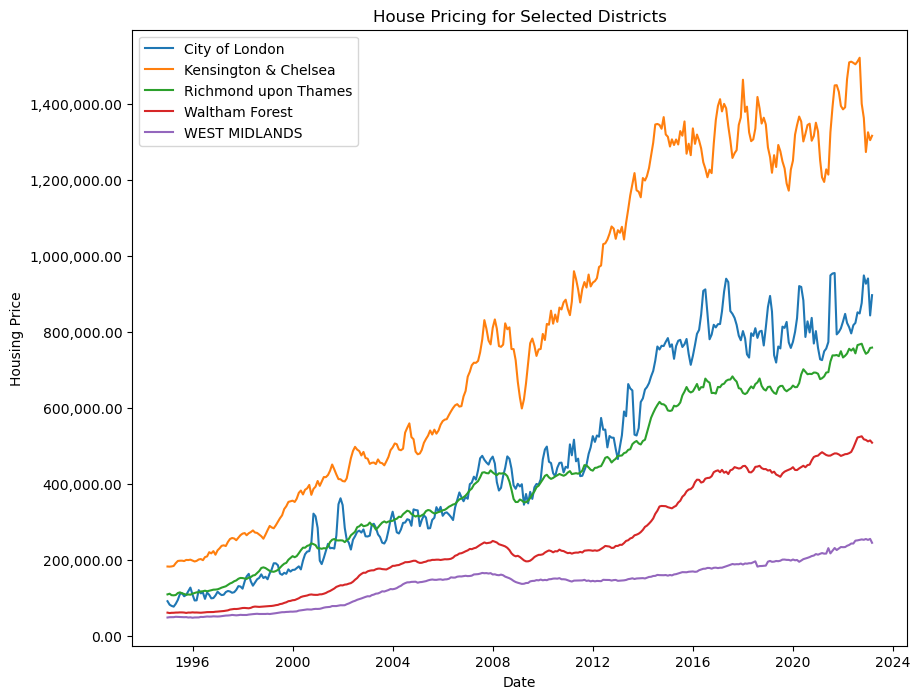

In [69]:
# Let's take a look to the most common District, City of London and four other random District and their Price fluctuation over the time.

fig, ax = plt.subplots(figsize=(10, 8))


district_chart = ['City of London', 'Kensington & Chelsea', 'Richmond upon Thames', 'Waltham Forest', 'WEST MIDLANDS']
for district in district_chart:
    df_district = df[df['District'] == district]
    ax.plot(df_district['Date'], df_district['Price'], label=district)


ax.yaxis.set_major_formatter(ticker.FuncFormatter('{:,.2f}'.format))
plt.xlabel('Date')
plt.ylabel('Housing Price')
plt.title('House Pricing for Selected Districts')
plt.legend()
plt.show()


To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [70]:
# To find out which District of London has seen the greatest house price increase, on average, over the past two decades, we will use group by District 
# for the last 20 years and calculate the price changes.

# First, we get the year of Date and store in as s new feature 'Year'
df['Year'] = df['Date'].apply(lambda t: t.year)

df_change = df[df['Year'] >= (df['Year'].max()-20)]

district_list = df_change['District'].unique()
results = []

for ind in district_list:
    district_data = df_change[df_change['District'] == ind]
    district_data = district_data.sort_values('Year')
    min_price = district_data['Price'].iloc[0]
    max_price = district_data['Price'].iloc[-1]
    change_of_price = max_price - min_price
    results.append({'District': ind, 'PriceChange Over 20 years': change_of_price})


df_price = pd.DataFrame(results)
df_price = df_price.sort_values('PriceChange Over 20 years', ascending=False)
df_price = df_price.reset_index(drop=True)
df_price


,District,PriceChange Over 20 years
0,Kensington & Chelsea,849433.82610
1,City of London,634955.81940
2,Camden,521749.45918
3,Westminster,509364.05474
4,Richmond upon Thames,466852.97600
5,Hackney,444618.06878
6,Hammersmith & Fulham,427767.33030
7,Islington,407618.09565
8,Inner London,385262.92003
9,Wandsworth,383288.23891


/var/folders/_s/hdxt2bf977g38xtj5cxkpwfw0000gn/T/ipykernel_78263/784654664.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_price['District'], rotation='vertical')


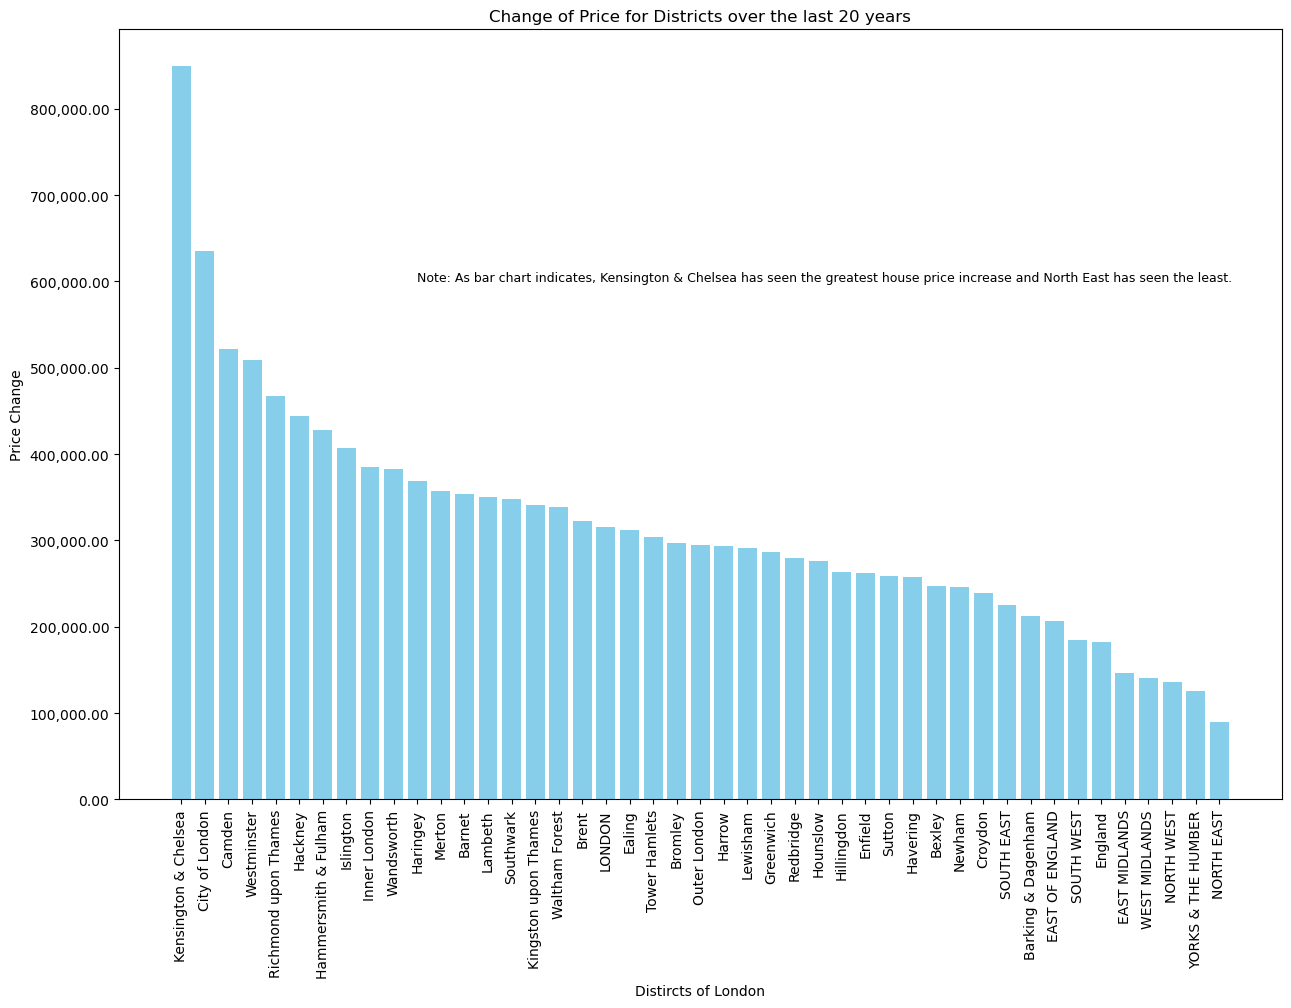

In [71]:
# For visualization purpose, we will plot the change of price for different districts over the last 20 years. 
fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(df_price['District'], df_price['PriceChange Over 20 years'], color='skyblue')
ax.yaxis.set_major_formatter(ticker.FuncFormatter('{:,.2f}'.format))
ax.set_xticklabels(df_price['District'], rotation='vertical')
ax.set_title('Change of Price for Districts over the last 20 years')
ax.set_xlabel('Distircts of London')
ax.set_ylabel('Price Change')
plt.text(10, 600000, 'Note: As bar chart indicates, Kensington & Chelsea has seen the greatest house price increase and North East has seen the least.', fontsize=9)
plt.show()

## 3. Modeling<a class="anchor" id="3"></a>
[Back to Table of Contents](#top)

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [72]:
# Creating the function for calculating the price ratio 

def create_price_ratio(df1):
    price_1998 = float(df1['Price'][df1['Year']==1998])
    price_2018 = float(df1['Price'][df1['Year']==2018])
    ratio = price_1998/price_2018
    return ratio


# Since for each year, there are 12 months, we have to fine the mean price over 12 months
df_price_mean = df.groupby(by=['District', 'Year']).mean()
df_price_mean = df_price_mean.reset_index()
df_price_mean



# Calling the create_price_ratio function for all District
district_list1 = df_price_mean['District'].unique()
result_ratio = []

for row in district_list1:
    district_data1 = df_price_mean[df_price_mean['District'] == row]
    ratio_price = create_price_ratio(district_data1)
    result_ratio.append({'District': row, 'Ratio of price_1998 / price_2018': ratio_price})

df_ratio = pd.DataFrame(result_ratio)
df_ratio



/var/folders/_s/hdxt2bf977g38xtj5cxkpwfw0000gn/T/ipykernel_78263/1347368444.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_price_mean = df.groupby(by=['District', 'Year']).mean()


,District,Ratio of price_1998 / price_2018
0,Barking & Dagenham,0.204223
1,Barnet,0.229453
2,Bexley,0.235351
3,Brent,0.204309
4,Bromley,0.244213
5,Camden,0.202620
6,City of London,0.188622
7,Croydon,0.238033
8,EAST MIDLANDS,0.275275
9,EAST OF ENGLAND,0.239987


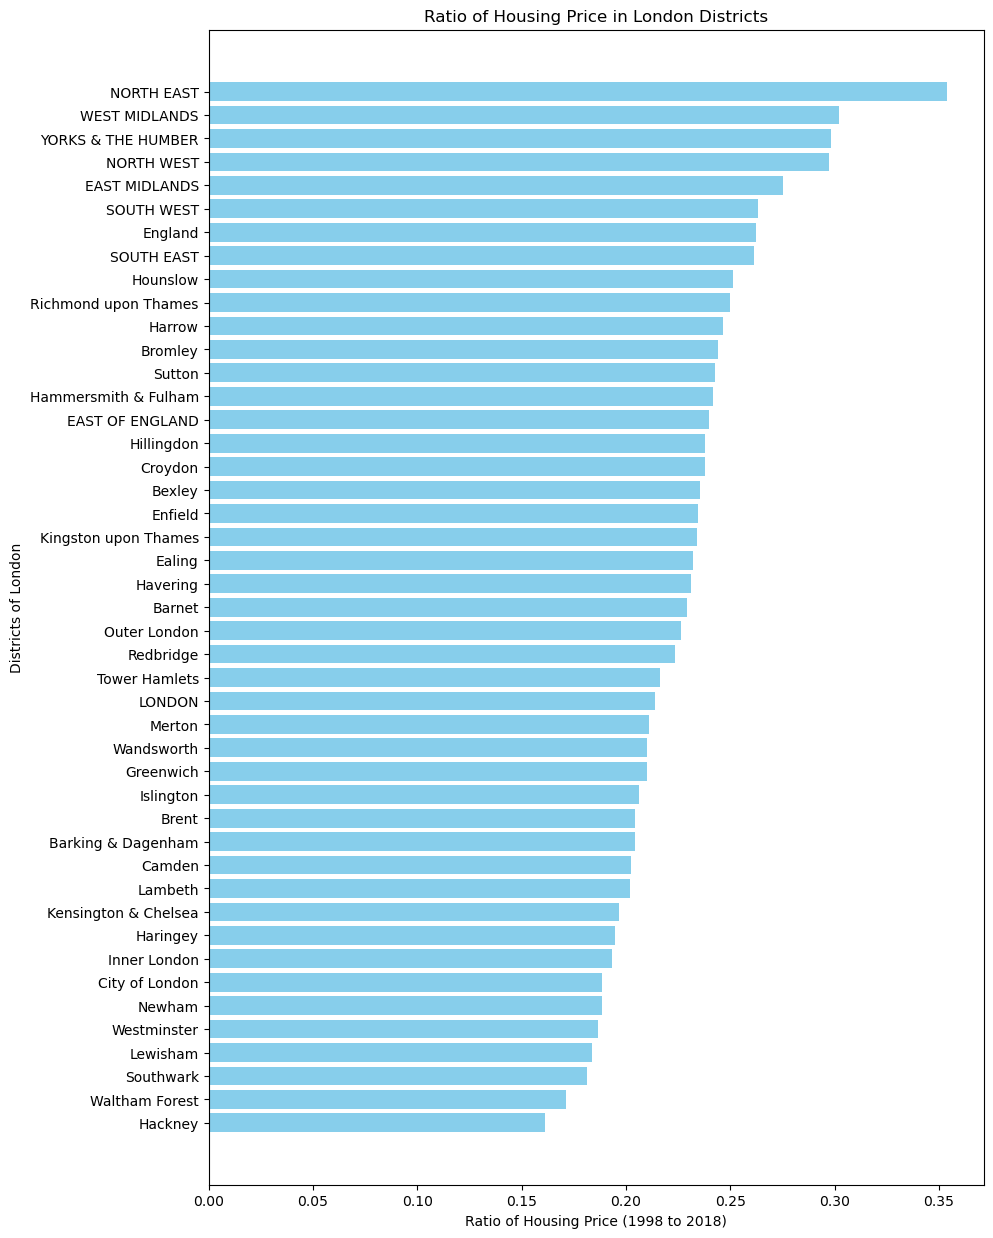

In [73]:
# To visualize the price ratio of 1998 to 2018, we will plot a bar chart

df_ratio = df_ratio.sort_values('Ratio of price_1998 / price_2018', ascending=True)  
plt.figure(figsize=(10,15))  
plt.barh(df_ratio['District'], df_ratio['Ratio of price_1998 / price_2018'], color='skyblue')  
plt.xlabel('Ratio of Housing Price (1998 to 2018)')
plt.ylabel('Districts of London')
plt.title('Ratio of Housing Price in London Districts')
plt.show()



In [74]:
# Let's take a look at the top 10 district regarding the mean price in 2023

df_price_mean = df.groupby(by=['District', 'Year']).mean()
df_price_mean = df_price_mean.reset_index()
df_price_mean_2023 = df_price_mean[df_price_mean['Year'] == 2023]  
df_price_mean_2023 = df_price_mean_2023.sort_values('Price', ascending=False)
df_price_mean_2023 = df_price_mean_2023.reset_index(drop=True)
df_price_mean_2023.head(10)


/var/folders/_s/hdxt2bf977g38xtj5cxkpwfw0000gn/T/ipykernel_78263/1312789633.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_price_mean = df.groupby(by=['District', 'Year']).mean()


,District,Year,Price
0,Kensington & Chelsea,2023,1.315185e+06
1,Westminster,2023,9.224570e+05
2,City of London,2023,8.934524e+05
3,Camden,2023,8.438650e+05
4,Hammersmith & Fulham,2023,7.590547e+05
5,Richmond upon Thames,2023,7.542133e+05
6,Islington,2023,6.779417e+05
7,Hackney,2023,6.355368e+05
8,Wandsworth,2023,6.343654e+05
9,Inner London,2023,6.179934e+05


## 4. Conclusion<a class="anchor" id="4"></a>

[Back to Table of Contents](#top)

What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

### <font color='#FFA07A'>**Conclusions:**</font> 

<font color='#FFA07A'>**Conclusion 1:**</font>  To answer the main question "Which borough of London has seen the greatest average increase in housing prices over the (approximately) two decades covered by the dataset?" we can refer to 
'Change of Price for Districts over the last 20 years' bar chart. 

As the bar chart showed, the top 5 district with the greatest average increase are as follows: 

1. Kensington & Chelsea
2. City of London
3. Camden
4. Westminster
5. Richmond upon Thames

One can conclude that these districts would have been the best districts for investing in real estate. 

<font color='#FFA07A'>**Conclusion 2:**</font> Moreover, the proportion of the mean price in 1998 relative to the mean price in 2018 was calculated. 

To get the greatest ratio between 1998 and 2018, the ratio should be 2018/1998. However, since the calculated ratio is the average price for 1998 divided by the average price for 2018 (1998/2018), as requested by the problem, a low ratio indicates a substantial price surge over time. Therefore, the districts with the lowest ratios would be those with the most considerable average price increase between 1998 and 2018.

<font color='#FFA07A'>**Conclusion 3:**</font> It should be noted that a lower increase in prices doesn't necessarily mean that the district is more affordable to live in, as we are not considering the absolute price levels. 
A district could have high prices in both 1998 and 2018 and still have a low increase rate, i.e., have the ratio (the average price for 1998 divided by the average price for 2018) closer to 1. 

<font color='#FFA07A'>**Conclusion 4:**</font> Considering the mean price in 2023, we did determine the top 10 districts:

1. Kensington & Chelsea	
2. Westminster	
3. City of London	
4. Camden	
5. Hammersmith & Fulham	
6. Richmond upon Thames
7. Islington	
8. Hackney	
9. Wandsworth
10. Inner London

<font color='#40E0D0'>**There are other conclusions we can reach if we perform further analysis.**</font> 